In [4]:
#%pip install opencv-python numpy matplotlib

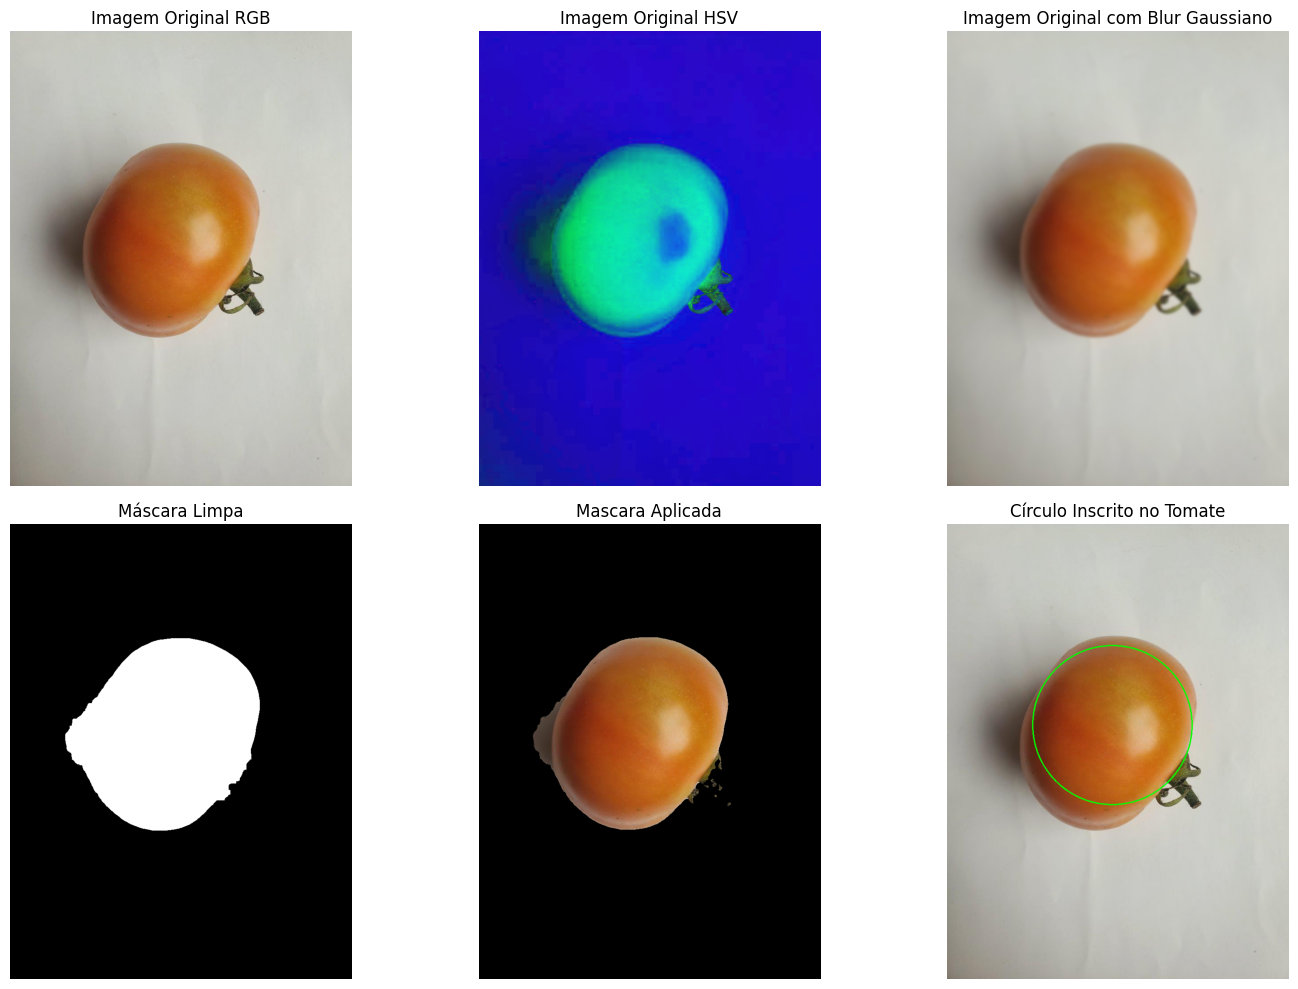

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Carregar e converter a imagem ---
image = cv2.imread('./test_images/5.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
image_blurred_rgb = cv2.GaussianBlur(image_rgb, (17, 17), 0)
image_blurred_hsv = cv2.cvtColor(image_blurred_rgb, cv2.COLOR_RGB2HSV)

# --- 2. Criar máscara para o tomate (ajuste os valores conforme necessário) ---
lower = np.array([0, 67, 50])   # H, S, V
upper = np.array([25, 255, 255])
mask = cv2.inRange(image_blurred_hsv, lower, upper)

# Aplicar a máscara
result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# --- 3. Limpeza da máscara com operações morfológicas ---
kernel = np.ones((10, 10), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# --- 4. Aplicar transformada de distância ---
dist_transform = cv2.distanceTransform(mask_clean, cv2.DIST_L2, 5)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist_transform)

# --- 5. Determinar o círculo inscrito ---
circle_center = maxLoc               # Centro do maior círculo
circle_radius = int(maxVal)          # Raio do maior círculo

# --- 6. Desenhar o círculo na imagem original ---
output = image_rgb.copy()
cv2.circle(output, circle_center, circle_radius, (0, 255, 0), 2)

# --- 7. Exibir resultados ---
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_hsv)
plt.title("Imagem Original HSV")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_blurred_rgb)
plt.title("Imagem Original com Blur Gaussiano")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask_clean, cmap='gray')
plt.title("Máscara Limpa")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(result)
plt.title("Mascara Aplicada")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(output)
plt.title("Círculo Inscrito no Tomate")
plt.axis('off')

plt.tight_layout()
plt.show()


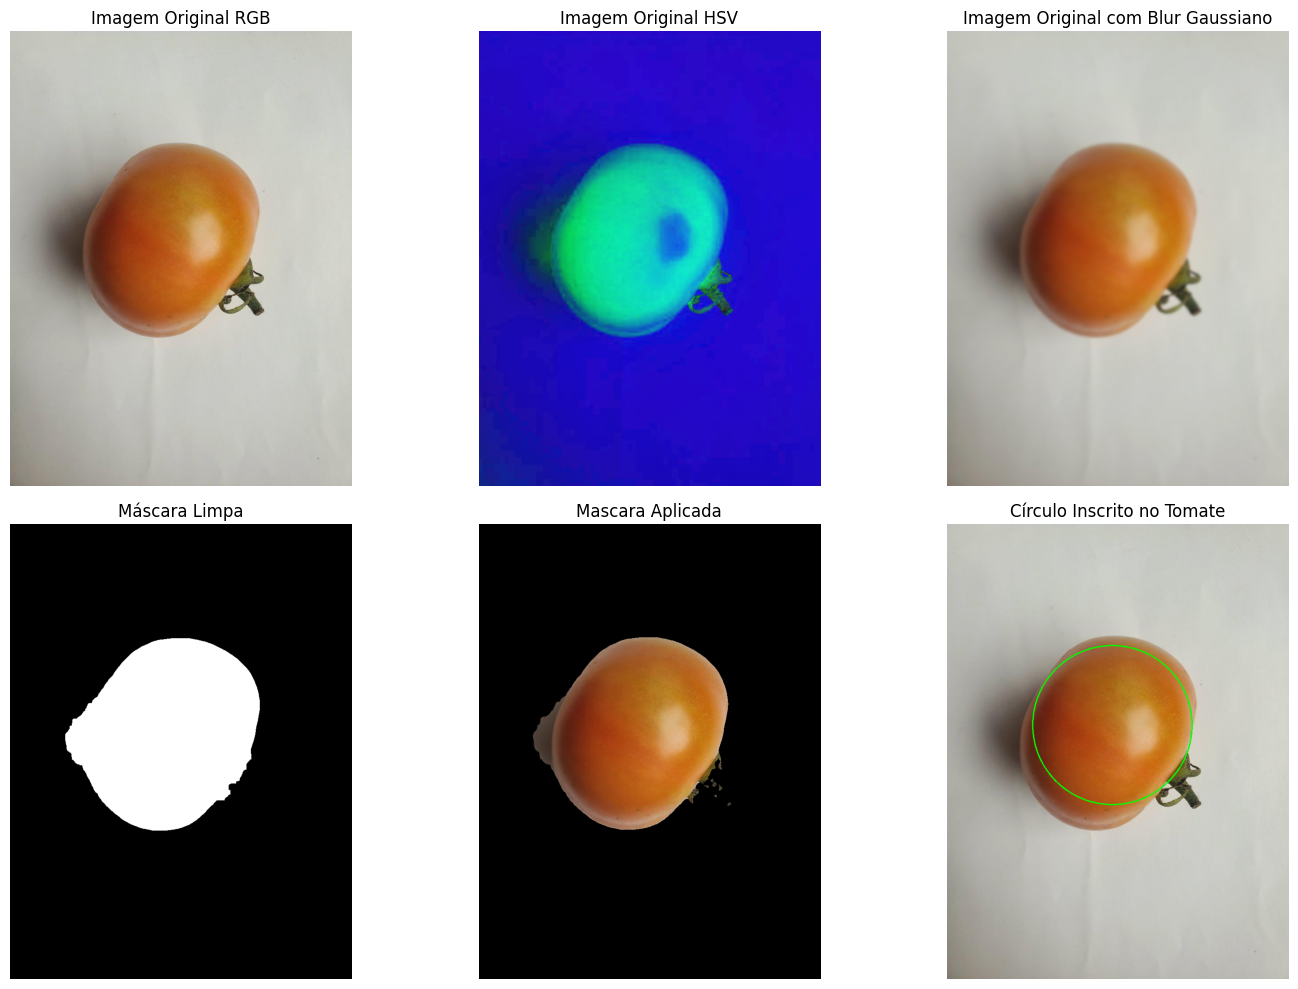

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Carregar e converter a imagem ---
image = cv2.imread('./test_images/5.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
image_blurred_rgb = cv2.GaussianBlur(image_rgb, (17, 17), 0)
image_blurred_hsv = cv2.cvtColor(image_blurred_rgb, cv2.COLOR_RGB2HSV)

# Intervalos para vermelho
lower_red1 = np.array([0, 100, 50])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 50])
upper_red2 = np.array([179, 255, 255])

lower_red3 = np.array([0, 67, 50])
upper_red3 = np.array([25, 255, 255])

# Máscaras para as duas faixas
mask1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
mask3 = cv2.inRange(image_blurred_hsv, lower_red3, upper_red3)
mask = cv2.bitwise_or(mask1, mask2)
mask = cv2.bitwise_or(mask, mask3)

# Aplicar a máscara
result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# --- 3. Limpeza da máscara com operações morfológicas ---
kernel = np.ones((10, 10), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# --- 4. Aplicar transformada de distância ---
dist_transform = cv2.distanceTransform(mask_clean, cv2.DIST_L2, 5)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist_transform)

# --- 5. Determinar o círculo inscrito ---
circle_center = maxLoc               # Centro do maior círculo
circle_radius = int(maxVal)          # Raio do maior círculo

# --- 6. Desenhar o círculo na imagem original ---
output = image_rgb.copy()
cv2.circle(output, circle_center, circle_radius, (0, 255, 0), 2)

# --- 7. Exibir resultados ---
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_hsv)
plt.title("Imagem Original HSV")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_blurred_rgb)
plt.title("Imagem Original com Blur Gaussiano")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask_clean, cmap='gray')
plt.title("Máscara Limpa")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(result)
plt.title("Mascara Aplicada")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(output)
plt.title("Círculo Inscrito no Tomate")
plt.axis('off')

plt.tight_layout()
plt.show()


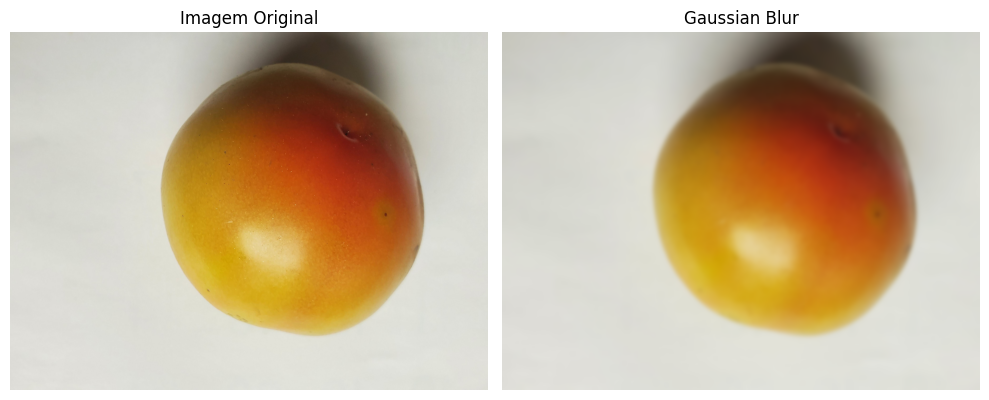

In [7]:
import cv2
import matplotlib.pyplot as plt

# 1. Carrega a imagem
image = cv2.imread('./test_images/1.jpg')

# 2. Aplica o efeito de blur gaussiano
# O segundo argumento é o tamanho do kernel (deve ser ímpar e positivo)
# O terceiro argumento é o desvio padrão no eixo X (se 0, é calculado automaticamente)
blurred = cv2.GaussianBlur(image, (111, 111), 0)

# 3. Converte para RGB para exibir corretamente com matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# 4. Mostra a imagem original e a com blur
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_rgb)
plt.title('Gaussian Blur')
plt.axis('off')

plt.tight_layout()
plt.show()
